# Loan Prediction

In [ ]:
# Import the libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

##1:Data Aquisition

In [ ]:
!pip show kaggle

Name: kaggle
Version: 1.5.16
Summary: Kaggle API
Home-page: https://github.com/Kaggle/kaggle-api
Author: Kaggle
Author-email: support@kaggle.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: bleach, certifi, python-dateutil, python-slugify, requests, six, tqdm, urllib3
Required-by: 


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset
!kaggle datasets download -d subhamjain/loan-prediction-based-on-customer-behavior

 78% 4.00M/5.15M [00:00<00:00, 6.02MB/s]
100% 5.15M/5.15M [00:00<00:00, 5.41MB/s]


In [ ]:
# Unzip the dataset
!unzip loan-prediction-based-on-customer-behavior.zip -d /content/

Archive:  loan-prediction-based-on-customer-behavior.zip
  inflating: /content/Sample Prediction Dataset.csv  
  inflating: /content/Test Data.csv  
  inflating: /content/Training Data.csv  


## 2. Data Exploration (EDA) and Preprocessing


In [ ]:
training_df = pd.read_csv("Training Data.csv")
testing_df = pd.read_csv("Test Data.csv")

In [ ]:
training_df = training_df.drop(columns=["Id"])
testing_df = testing_df.drop(columns=["ID"])

In [ ]:
training_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
testing_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [ ]:
training_df.columns

Index(['Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership',
       'Car_Ownership', 'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS',
       'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [ ]:
len(training_df.columns), len(testing_df.columns)

(12, 11)

In [ ]:
len(training_df)

252000

In [ ]:
len(testing_df)

28000

In [ ]:
# Check for null values
training_df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
# Check for null values
testing_df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
dtype: int64

In [ ]:
# Check for unique values
training_df.index.is_unique

True

In [ ]:
testing_df.index.is_unique

True

In [ ]:
#Convert the categorical features to numerical features
# List of categorical column names
categorical_columns = ["Married/Single", "House_Ownership", "Car_Ownership", "Profession", "CITY", "STATE"]

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply Label Encoding to each categorical column
for column in categorical_columns:
    training_df[column] = label_encoder.fit_transform(training_df[column])
    testing_df[column] = label_encoder.fit_transform(testing_df[column])

In [ ]:
training_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,251,13,3,13,0
1,7574516,40,10,1,2,0,43,227,14,9,13,0
2,3991815,66,4,0,2,0,47,8,12,4,10,0
3,6256451,41,2,1,2,1,43,54,17,2,12,1
4,5768871,47,11,1,2,0,11,296,22,3,14,1


In [ ]:
testing_df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,1,2,0,26,181,28,4,13
1,1215004,25,5,1,2,0,24,131,14,5,10
2,8901342,50,12,1,2,0,30,290,14,9,14
3,1944421,49,9,0,2,1,1,171,14,3,12
4,13429,25,18,1,2,1,12,39,28,13,11


## 3: Data Visualization

In [ ]:
# Create a function to plot scatter plot between two columns of the dataset
def scatter_plot(x_data, y_data):
  """
  Plots a scatterplot between two columns of the dataset

  Args:
    x_data: column1 of the dataset.
    y_data: column2 of the dataset
  """

  # Create a scatter plot
  plt.scatter(x_data, y_data, color='blue', marker='o', label='Scatter Plot')

  # Add labels and title
  plt.xlabel(x_data.name)
  plt.ylabel(y_data.name)
  plt.title(f'{x_data.name} vs {y_data.name}')

  # Add a legend
  plt.legend()

  # Display the plot
  plt.show()

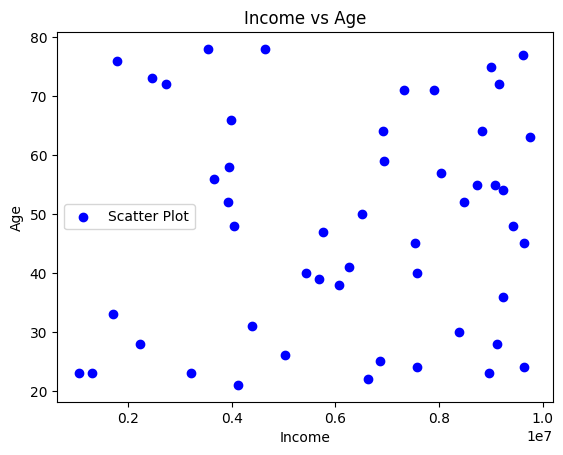

In [ ]:
# Plot a scatter plot for the first 50 samples of the training dataset
scatter_plot(training_df["Income"][:50], training_df["Age"][:50])

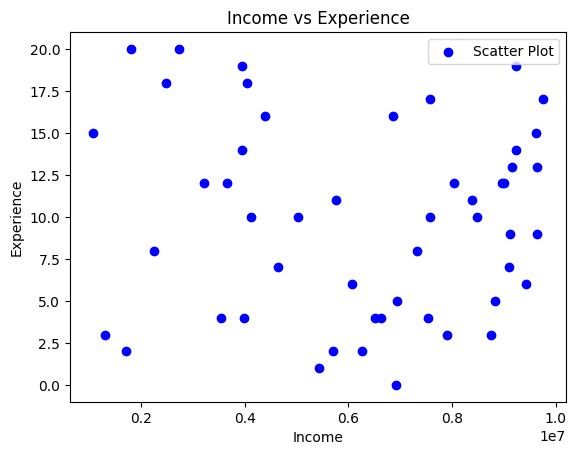

In [ ]:
# Plot a scatter plot for the first 50 samples of the training dataset
scatter_plot(training_df["Income"][:50], training_df["Experience"][:50])

Text(0.5, 1.0, 'Age Count')

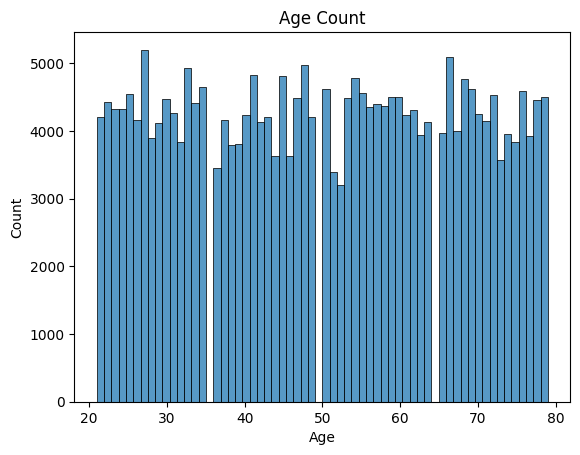

In [ ]:
# Plot Histogram for age column
sns.histplot(training_df.Age)
plt.xlabel("Age")
plt.title("Age Count")

<Axes: ylabel='Income'>

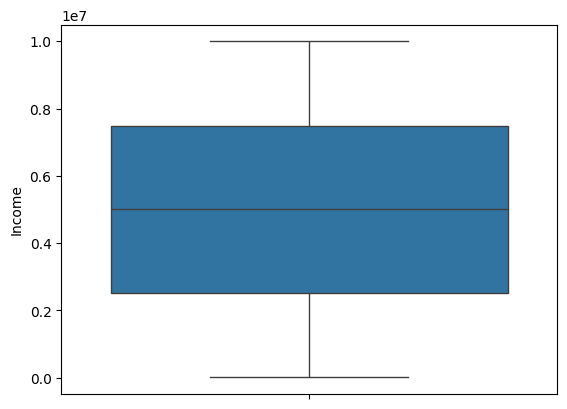

In [ ]:
# Plot Box plot on Income column
sns.boxplot(training_df.Income)

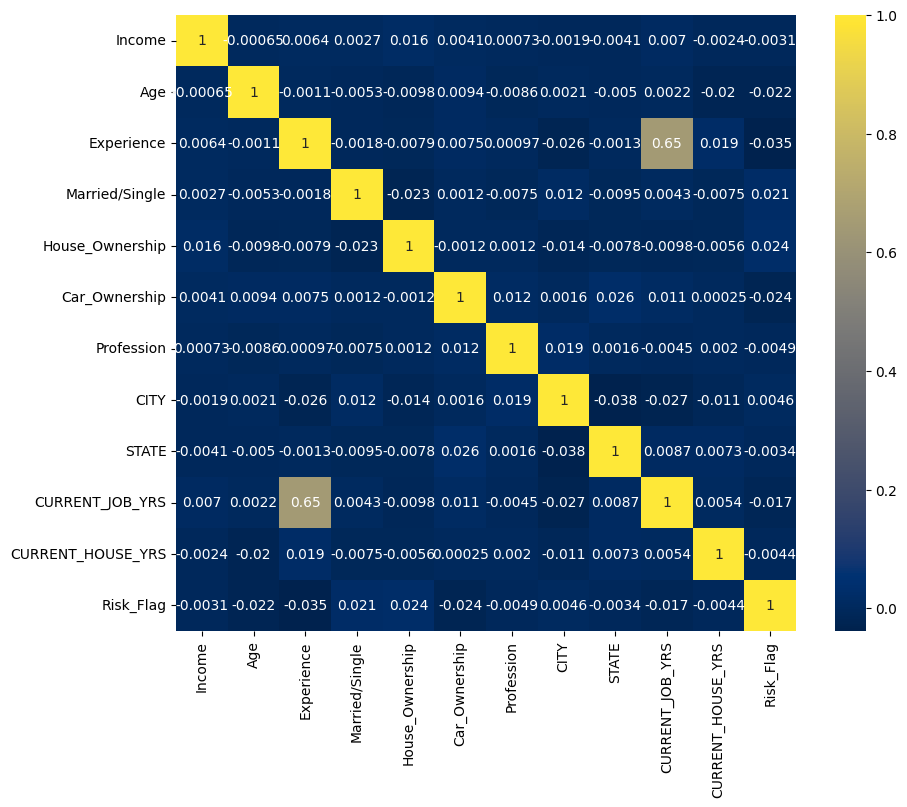

In [ ]:
# Plot Heat map
plt.figure(figsize=(10,8))
sns.heatmap(training_df.corr(),annot=True,cmap='cividis')

plt.show()

## 3: Splitting into training and testing set

In [ ]:
x = training_df.drop("Risk_Flag", axis=1)
y = training_df["Risk_Flag"]

In [ ]:
# Split into train & test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

## 4. Modelling

In [ ]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [ ]:
model_scores = fit_and_score(models=models,
                             X_train=x_train,
                             X_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.8767857142857143,
 'KNN': 0.888234126984127,
 'Random Forest': 0.8980952380952381}

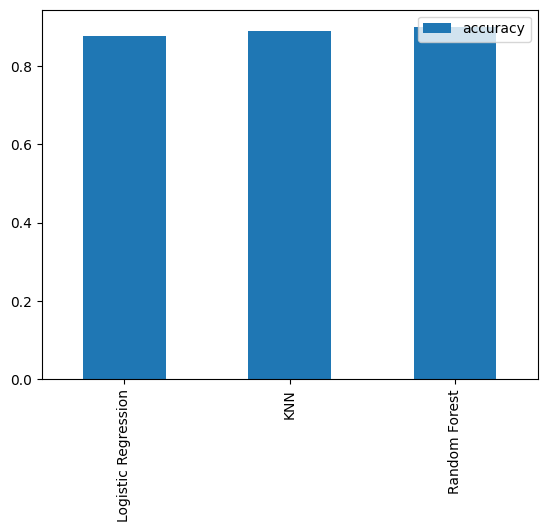

In [ ]:
# Comparing the models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

### Hyperparameter Tuning

In [ ]:
train_scores = []
test_scores = []

# List of different values of n_neighbours
neighbors = range(1, 15)

# Initialize KNN
knn = KNeighborsClassifier()

for i in neighbors:
  knn.set_params(n_neighbors=i)
  knn.fit(x_train, y_train) # Fitting the algorith
  train_scores.append(knn.score(x_train, y_train)) # Updating train_scores
  test_scores.append(knn.score(x_test, y_test)) # updating test_scores

In [ ]:
train_scores, test_scores

([0.9227083333333334,
  0.8964136904761905,
  0.9026686507936508,
  0.8968253968253969,
  0.9005952380952381,
  0.8990674603174603,
  0.900734126984127,
  0.9002827380952381,
  0.9006051587301588,
  0.9007440476190476,
  0.9011011904761905,
  0.9014186507936508,
  0.900922619047619,
  0.900952380952381],
 [0.8735119047619048,
  0.8829166666666667,
  0.8851388888888889,
  0.8868849206349206,
  0.888234126984127,
  0.8885119047619048,
  0.8890873015873015,
  0.8896825396825396,
  0.8892460317460318,
  0.8893849206349206,
  0.890079365079365,
  0.8903968253968254,
  0.8908928571428572,
  0.8898214285714285])

Maximum model score: 89.09%


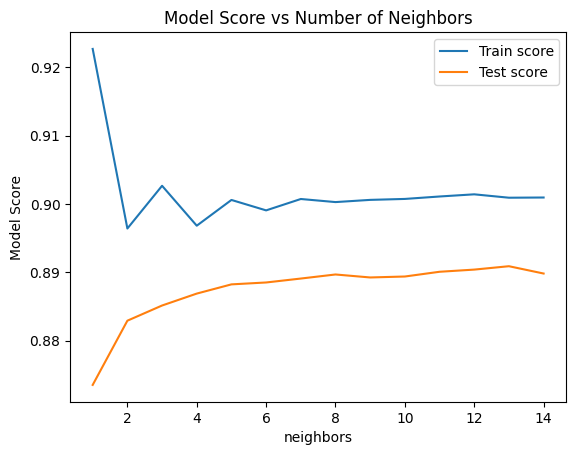

In [ ]:
# Plot the model scores
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xlabel("neighbors")
plt.ylabel("Model Score")
plt.title("Model Score vs Number of Neighbors")
plt.legend()
print(f"Maximum model score: {max(test_scores)*100:.2f}%")

In [ ]:
# Tuning with RandomizedSearchCV

# Define the hyperparameter search space for LogisticRegression
log_param_dist = {
    'C': np.logspace(-5, 5, 20),  # Regularization strength
    'penalty': ['l1', 'l2'],  # Type of regularization
    'solver': ['saga']  # Solver algorithm
}

In [ ]:
# Tune LogisticRegression model
# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_param_dist,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga']},
                   verbose=True)

In [ ]:
rs_log_reg.best_params_

{'solver': 'saga', 'penalty': 'l2', 'C': 0.5455594781168515}

In [ ]:
# Evaluate the model
rs_log_reg.score(x_test, y_test)

0.8767857142857143

## Model Selection

In [ ]:
print(f"KNN Model (Tuned): {max(test_scores)*100:.2f}%")
print(f"Logistic Regression (RandomizedSearchCV): {(rs_log_reg.score(x_test, y_test))*100:.2f}%")

KNN Model (Tuned): 89.09%
Logistic Regression (RandomizedSearchCV): 87.68%


In [ ]:
model_scores

{'Logistic Regression': 0.8767857142857143,
 'KNN': 0.888234126984127,
 'Random Forest': 0.8980952380952381}

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)
rf_model.predict(x_test)
rf_model.score(x_test, y_test)

0.8979166666666667

In [ ]:
# Since Random Forest has highest perfomarnce we will select Random Forest for predictions

sample_data = {"Income": 13023043,
               "Age": 33,
               "Experience": 10,
               "Married/Single": 1,
               "House_Ownership": 3,
               "Car_Ownership": 5,
               "Profession": 433,
               "CITY": 220,
               "STATE": 15,
               "CURRENT_JOB_YRS": 11,
               "CURRENT_HOUSE_YRS": 16}

sample_df = pd.DataFrame(sample_data, index=[0])
sample_df
prediction = rf_model.predict(sample_df)
if prediction[0] == 0:
  print(f"Prediction: {prediction[0]} \n No risk")
else:
  print(f"Prediction: {prediction[0]} \n High Risk")

Prediction: 0 
 No risk
